In [1]:
import numpy as np
import cv2
import pandas as pd

from matplotlib import pyplot as plt

(966, 1296)
(1251936,)


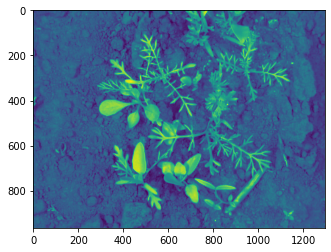

In [2]:
img = cv2.imread('001_image.png')
b,g,r=cv2.split(img)
img = g
plt.imshow(img)

#adding original picture value to the data frame as feature 1
img2 = img.reshape(-1)
df = pd.DataFrame()
df['Original Image'] = img2

print(img.shape)
# print(img_g.shape)
print(img2.shape)

In [3]:
#Generate Gabor features
num = 1  #To count numbers of gabor filters being created
kernels = []
for theta in range(2):   
    theta = theta / 4. * np.pi
    for sigma in (1, 3):  #
        for lamda in np.arange(0, np.pi, np.pi / 4):   
            for gamma in (0.05, 0.5):  
                
                gabor_label = 'Gabor' + str(num)  #Labelling Gabor columns as Gabor1, Gabor2, etc.
                ksize=13
                kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F) 
                kernels.append(kernel)
                
                #Applying filters one by one
                fimg = cv2.filter2D(img2, cv2.CV_8UC3, kernel)
                filtered_img = fimg.reshape(-1)
                df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
                print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
                num += 1  
# print(df.head)              

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.05
Gabor2 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.5
Gabor3 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor4 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor5 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor6 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor7 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor8 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor9 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.05
Gabor10 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.5
Gabor11 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor12 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor13 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor14 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor15 : theta= 0.0 : sigma= 3 : lamda= 2

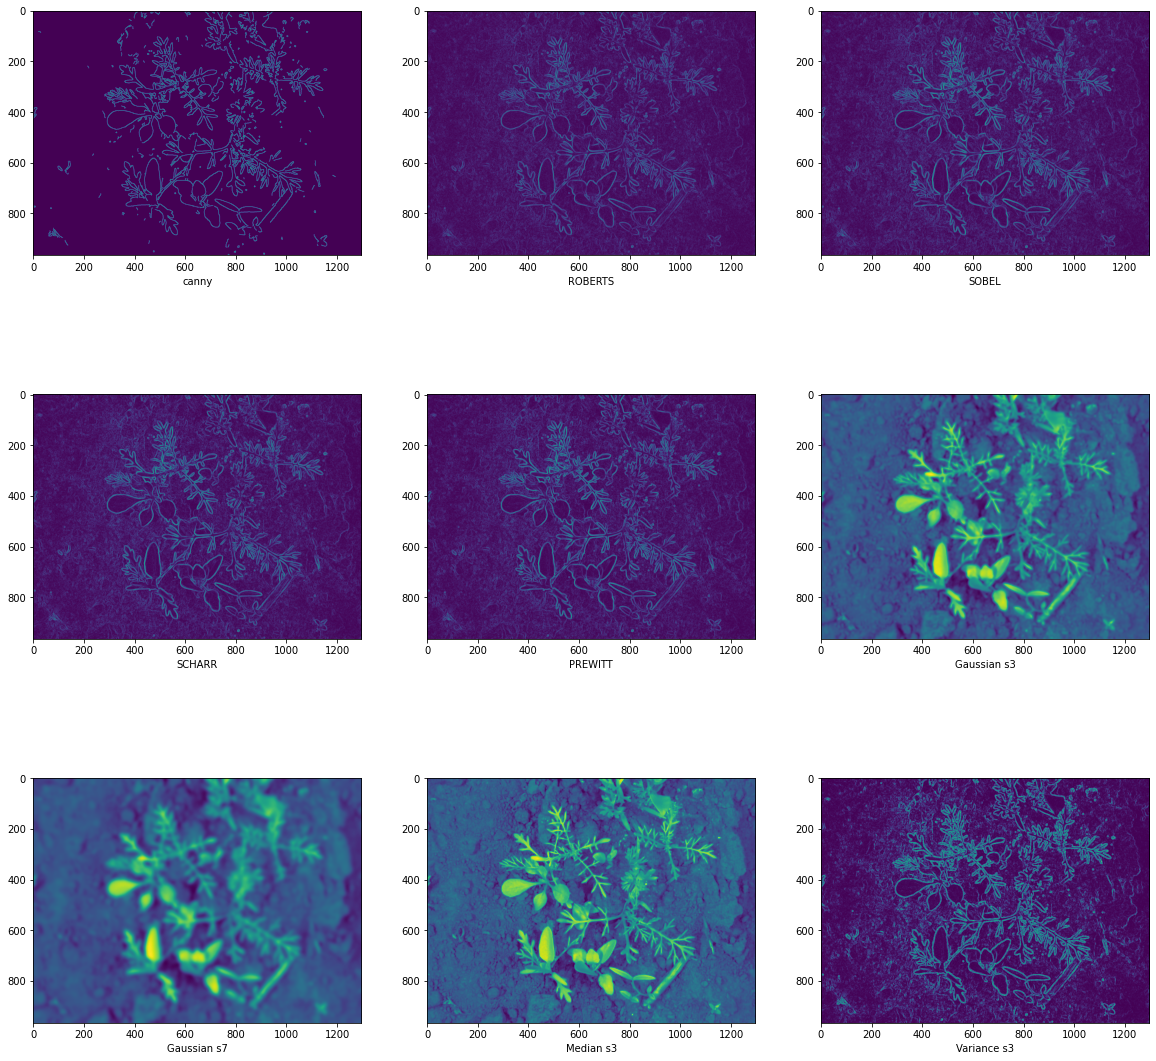

In [4]:
#Gerating OTHER FEATURES and adding them to the data frame
rows,columns=3,3
fig = plt.figure(figsize=(20, 20))                
#CANNY EDGE
edges = cv2.Canny(img, 100,200) #Image, min and max values
fig.add_subplot(rows, columns, 1,xlabel='canny')
plt.imshow(edges)
edges1 = edges.reshape(-1)
df['Canny Edge'] = edges1 #Add column to original dataframe

from skimage.filters import roberts, sobel, scharr, prewitt

#ROBERTS EDGE
edge_roberts = roberts(img)
fig.add_subplot(rows, columns, 2,xlabel='ROBERTS')
plt.imshow(edge_roberts)
edge_roberts1 = edge_roberts.reshape(-1)
df['Roberts'] = edge_roberts1

#SOBEL
edge_sobel = sobel(img)
fig.add_subplot(rows, columns, 3,xlabel='SOBEL')
plt.imshow(edge_sobel)
edge_sobel1 = edge_sobel.reshape(-1)
df['Sobel'] = edge_sobel1

#SCHARR
edge_scharr = scharr(img)
fig.add_subplot(rows, columns, 4,xlabel='SCHARR')
plt.imshow(edge_scharr)
edge_scharr1 = edge_scharr.reshape(-1)
df['Scharr'] = edge_scharr1

#PREWITT
edge_prewitt = prewitt(img)
fig.add_subplot(rows, columns, 5,xlabel='PREWITT')
plt.imshow(edge_prewitt)
edge_prewitt1 = edge_prewitt.reshape(-1)
df['Prewitt'] = edge_prewitt1

#GAUSSIAN with sigma=3
from scipy import ndimage as nd
gaussian_img = nd.gaussian_filter(img, sigma=3)
fig.add_subplot(rows, columns, 6,xlabel='Gaussian s3')
plt.imshow(gaussian_img)
gaussian_img1 = gaussian_img.reshape(-1)
df['Gaussian s3'] = gaussian_img1

#GAUSSIAN with sigma=7
gaussian_img2 = nd.gaussian_filter(img, sigma=7)
fig.add_subplot(rows, columns, 7,xlabel='Gaussian s7')
plt.imshow(gaussian_img2)
gaussian_img3 = gaussian_img2.reshape(-1)
df['Gaussian s7'] = gaussian_img3

#MEDIAN with sigma=3
median_img = nd.median_filter(img, size=3)
fig.add_subplot(rows, columns, 8,xlabel='Median s3')
plt.imshow(median_img)
median_img1 = median_img.reshape(-1)
df['Median s3'] = median_img1

#VARIANCE with size=3
variance_img = nd.generic_filter(img, np.var, size=3)
fig.add_subplot(rows, columns, 9,xlabel='Variance s3')
plt.imshow(variance_img)
variance_img1 = variance_img.reshape(-1)
df['Variance s3'] = variance_img1  #Add column to original dataframe


In [5]:
#importing mask
labeled_img = cv2.imread('001_mask.png')
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_BGR2GRAY)
labeled_img1 = labeled_img.reshape(-1)
df['Labels'] = labeled_img1

print(df.head())


   Original Image  Gabor1  Gabor2  Gabor3  Gabor4  Gabor5  Gabor6  Gabor7  \
0              53       0       0     255     146     120      47      49   
1              53       0       0     255     146     120      47      49   
2              48       0       0     255     145     120      47      49   
3              48       0       0     255     144     122      47      49   
4              48       0       0     255     145     124      47      50   

   Gabor8  Gabor9  ...  Canny Edge   Roberts         Sobel    Scharr  \
0      19       0  ...           0  0.000000  9.813078e-18  0.000000   
1      19       0  ...           0  0.013865  1.096112e-02  0.011561   
2      19       0  ...           0  0.013865  1.550136e-02  0.016350   
3      19       0  ...           0  0.002773  4.999039e-03  0.003749   
4      19       0  ...           0  0.014139  9.038769e-03  0.009534   

        Prewitt  Gaussian s3  Gaussian s7  Median s3  Variance s3  Labels  
0  1.962616e-17           51

Accuracy on training data =  0.9999880185472888
Accuracy =  0.9678498327592232
Gabor8            1.171498e-01
Median s3         1.123522e-01
Gaussian s3       1.059163e-01
Gabor5            7.065968e-02
Gabor14           6.763472e-02
Gabor6            5.817959e-02
Gabor13           5.688524e-02
Gabor23           5.330624e-02
Gabor7            3.564430e-02
Original Image    3.492841e-02
Gabor31           2.943904e-02
Gabor29           2.929313e-02
Sobel             2.560862e-02
Scharr            2.518540e-02
Prewitt           2.514261e-02
Gabor24           2.158719e-02
Gabor21           1.979683e-02
Gaussian s7       1.947125e-02
Roberts           1.942335e-02
Gabor30           1.545296e-02
Gabor22           1.514834e-02
Variance s3       1.476688e-02
Gabor32           1.206072e-02
Gabor4            1.000341e-02
Canny Edge        4.952188e-03
Gabor20           1.161776e-05
Gabor3            3.091074e-10
Gabor28           7.085797e-11
Gabor18           0.000000e+00
Gabor1            0.00

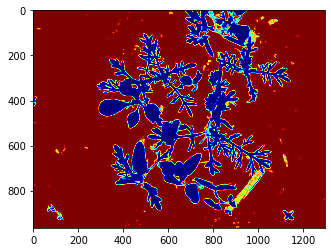

In [7]:

#Define the categorical variables
Y = df["Labels"].values

#Define the independent variables
X = df.drop(labels = ["Labels"], axis=1) 

#Split data into train and test to verify accuracy after fitting the model. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=20)


from sklearn.ensemble import RandomForestClassifier

# Instantiate model with n number of decision trees
model = RandomForestClassifier(n_estimators = 100, random_state = 42)

# Train the model on training data
model.fit(X_train, y_train)


#First test prediction on the training data itself.
prediction_test_train = model.predict(X_train)

#Test prediction on testing data. 
prediction_test = model.predict(X_test)

#Let us check the accuracy on test data
from sklearn import metrics
#Print the prediction accuracy

#First check the accuracy on training data. This will be higher than test data prediction accuracy.
print ("Accuracy on training data = ", metrics.accuracy_score(y_train, prediction_test_train))
#Check accuracy on test dataset. If this is too low compared to train it indicates overfitting on training data.
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_test))





#printting into nice format(gives us information about the importance of that feature)

feature_list = list(X.columns)
feature_imp = pd.Series(model.feature_importances_,index=feature_list).sort_values(ascending=False)
print(feature_imp)


#Train on training images, validate on test images and deploy the model on unknown images. 

import pickle

#Save the trained model as pickle string to disk for future use
filename = "random_model"
pickle.dump(model, open(filename, 'wb'))

#To test the model on future datasets
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(X)

segmented = result.reshape((img.shape))

from matplotlib import pyplot as plt
plt.imshow(segmented, cmap ='jet')



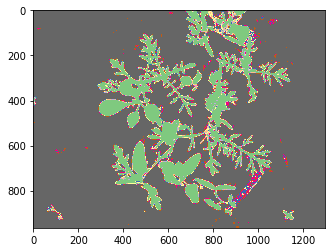

In [14]:
from matplotlib import pyplot as plt
plt.imshow(segmented, cmap ='Accent')

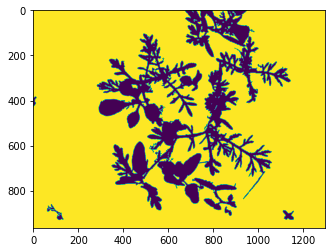

In [8]:
plt.imshow(labeled_img)

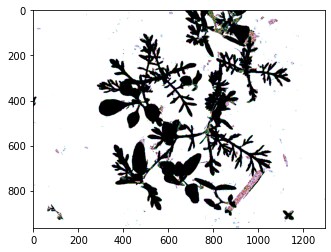

In [9]:
from matplotlib import pyplot as plt
plt.imshow(segmented, cmap ='cubehelix')

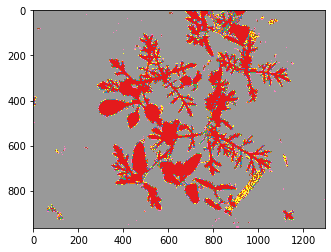

In [10]:
plt.imshow(segmented, cmap ='Set1')

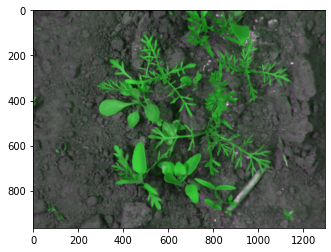

In [11]:

img2= cv2.imread('001_image.png')
plt.imshow(img2)